In [1]:
import pandas as pd  # import the neccessary libraries
pd.set_option('display.max_columns', 300)  # display all the columns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor  # In case we want to use k-nearest neighbor model
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn')
sns.set(style="white")

In [2]:
df = pd.read_csv('graduation_train.csv')  # read in the train dataset
df.head()  # check the first 5 rows

,DBN,schoolyear,% of cohort,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs
0,02M432,2010,76.6,0.0,60.0,141,141.0,0.0,0.0,0.0,9.2,22.7,8.5,46.1,38.3,5.7,56.7,43.3,0,0.0,0.0,0,0,0.0,1,0
1,08X405,2010,66.8,0.0,80.7,3925,1481.0,1085.0,719.0,640.0,9.7,18.7,6.8,22.5,61.3,8.8,58.9,41.1,0,0.0,0.0,0,0,0.0,1,0
2,10X433,2005,65.1,74.5,0.0,493,157.0,132.0,121.0,83.0,8.5,8.5,1.4,34.5,59.8,2.4,28.8,71.2,0,0.0,0.0,0,0,0.0,1,0
3,31R470,2008,52.4,42.9,0.0,161,5.0,72.0,84.0,0.0,6.2,11.2,2.5,26.1,50.3,21.1,42.2,57.8,0,0.0,0.0,0,0,0.0,1,0
4,18K642,2011,74.0,0.0,76.4,305,75.0,90.0,83.0,57.0,11.1,12.5,2.3,82.3,10.5,3.9,62.6,37.4,0,0.0,0.0,0,0,0.0,1,0


In [3]:
df = pd.get_dummies(df, columns = ['schoolyear'], drop_first= True)  # create dummy columns for year

In [4]:
df.head()

,DBN,% of cohort,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,schoolyear_2006,schoolyear_2007,schoolyear_2008,schoolyear_2009,schoolyear_2010,schoolyear_2011
0,02M432,76.6,0.0,60.0,141,141.0,0.0,0.0,0.0,9.2,22.7,8.5,46.1,38.3,5.7,56.7,43.3,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,1,0
1,08X405,66.8,0.0,80.7,3925,1481.0,1085.0,719.0,640.0,9.7,18.7,6.8,22.5,61.3,8.8,58.9,41.1,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,1,0
2,10X433,65.1,74.5,0.0,493,157.0,132.0,121.0,83.0,8.5,8.5,1.4,34.5,59.8,2.4,28.8,71.2,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,0,0
3,31R470,52.4,42.9,0.0,161,5.0,72.0,84.0,0.0,6.2,11.2,2.5,26.1,50.3,21.1,42.2,57.8,0,0.0,0.0,0,0,0.0,1,0,0,0,1,0,0,0
4,18K642,74.0,0.0,76.4,305,75.0,90.0,83.0,57.0,11.1,12.5,2.3,82.3,10.5,3.9,62.6,37.4,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,0,1


In [5]:
# create a columns to aggregate minority students percentage
df['minority_per'] = df['asian_per'] + df['black_per'] + df['hispanic_per']

In [6]:
df['minority_per'].mean()

90.38820840950659

In [7]:
df.isnull().sum().any()  # check if there are any missing values

False

## Train-Test Split
___

In [8]:
df_features = df.drop(columns = ['DBN','% of cohort'])

target = df['% of cohort']

In [9]:
df_features.shape

(2188, 30)

In [10]:
train_X, test_X, train_y, test_y = train_test_split(df_features, target, random_state=9,test_size=0.25)

In [11]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(train_X)

#transform the training data
train_X = pd.DataFrame(data=scaler.transform(train_X), columns=df_features.columns)

#transform the testing data
test_X = pd.DataFrame(data=scaler.transform(test_X), columns=df_features.columns)

In [12]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(train_X, train_y)

train_y_pred = lm.predict(train_X
                         )
train_rmse = np.sqrt(metrics.mean_squared_error(train_y, train_y_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 13.123691263569956


### Evaluating on the test set

In [13]:
#use fitted model to predict on the test examples
test_y_pred = lm.predict(test_X)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(test_y, test_y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 12.213930727660568
Training:  13 vs. Testing:  12


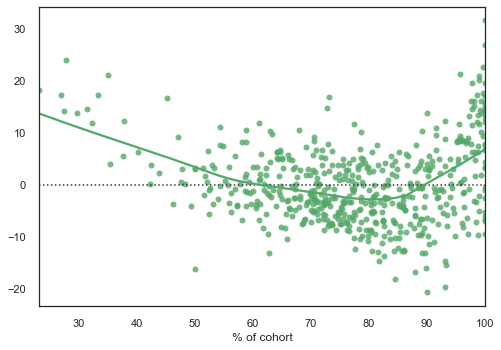

In [14]:
sns.residplot(test_y, test_y_pred, lowess=True, color="g")

## Generating Polynomial and Interaction features

In [15]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
print(df_poly2.shape)
df_poly2.head()

(2188, 495)


,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,schoolyear_2006,schoolyear_2007,schoolyear_2008,schoolyear_2009,schoolyear_2010,schoolyear_2011,minority_per,fl_percent^2,fl_percent frl_percent,fl_percent total_enrollment,fl_percent grade9,fl_percent grade10,fl_percent grade11,fl_percent grade12,fl_percent ell_percent,fl_percent sped_percent,fl_percent asian_per,fl_percent black_per,fl_percent hispanic_per,fl_percent white_per,fl_percent male_per,fl_percent female_per,fl_percent has_junior_high,fl_percent total_elem,fl_percent total_kg,fl_percent has_kg,fl_percent has_elem,fl_percent total_junior_high,fl_percent only_hs,fl_percent levels_not_hs,fl_percent schoolyear_2006,fl_percent schoolyear_2007,fl_percent schoolyear_2008,fl_percent schoolyear_2009,fl_percent schoolyear_2010,fl_percent schoolyear_2011,fl_percent minority_per,frl_percent^2,frl_percent total_enrollment,frl_percent grade9,frl_percent grade10,frl_percent grade11,frl_percent grade12,frl_percent ell_percent,frl_percent sped_percent,frl_percent asian_per,frl_percent black_per,frl_percent hispanic_per,frl_percent white_per,frl_percent male_per,frl_percent female_per,frl_percent has_junior_high,frl_percent total_elem,frl_percent total_kg,frl_percent has_kg,frl_percent has_elem,frl_percent total_junior_high,frl_percent only_hs,frl_percent levels_not_hs,frl_percent schoolyear_2006,frl_percent schoolyear_2007,frl_percent schoolyear_2008,frl_percent schoolyear_2009,frl_percent schoolyear_2010,frl_percent schoolyear_2011,frl_percent minority_per,total_enrollment^2,total_enrollment grade9,total_enrollment grade10,total_enrollment grade11,total_enrollment grade12,total_enrollment ell_percent,total_enrollment sped_percent,total_enrollment asian_per,total_enrollment black_per,total_enrollment hispanic_per,total_enrollment white_per,total_enrollment male_per,total_enrollment female_per,total_enrollment has_junior_high,total_enrollment total_elem,total_enrollment total_kg,total_enrollment has_kg,total_enrollment has_elem,total_enrollment total_junior_high,total_enrollment only_hs,total_enrollment levels_not_hs,total_enrollment schoolyear_2006,total_enrollment schoolyear_2007,total_enrollment schoolyear_2008,total_enrollment schoolyear_2009,total_enrollment schoolyear_2010,total_enrollment schoolyear_2011,total_enrollment minority_per,grade9^2,grade9 grade10,grade9 grade11,grade9 grade12,grade9 ell_percent,grade9 sped_percent,grade9 asian_per,grade9 black_per,grade9 hispanic_per,grade9 white_per,grade9 male_per,grade9 female_per,grade9 has_junior_high,grade9 total_elem,grade9 total_kg,grade9 has_kg,grade9 has_elem,grade9 total_junior_high,grade9 only_hs,grade9 levels_not_hs,grade9 schoolyear_2006,grade9 schoolyear_2007,grade9 schoolyear_2008,grade9 schoolyear_2009,grade9 schoolyear_2010,grade9 schoolyear_2011,grade9 minority_per,grade10^2,grade10 grade11,grade10 grade12,grade10 ell_percent,grade10 sped_percent,grade10 asian_per,...,male_per total_elem,male_per total_kg,male_per has_kg,male_per has_elem,male_per total_junior_high,male_per only_hs,male_per levels_not_hs,male_per schoolyear_2006,male_per schoolyear_2007,male_per schoolyear_2008,male_per schoolyear_2009,male_per schoolyear_2010,male_per schoolyear_2011,male_per minority_per,female_per^2,female_per has_junior_high,female_per total_elem,female_per total_kg,female_per has_kg,female_per has_elem,female_per total_junior_high,female_per only_hs,female_per levels_not_hs,female_per schoolyear_2006,female_per schoolyear_2007,female_per schoolyear_2008,female_per schoolyear_2009,female_per schoolyear_2010,female_per schoolyear_2011,female_per minority_per,has_junior_high^2,has_junior_high total_elem,has_junior_high total_kg,has_junior_high has_kg,has_junior_high has_elem,has_junior_high total_junior_high,has_junior_high only_h

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9, test_size=0.2)

In [17]:
X_train.shape

(1750, 495)

In [18]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [19]:
X_test.head()

,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,schoolyear_2006,schoolyear_2007,schoolyear_2008,schoolyear_2009,schoolyear_2010,schoolyear_2011,minority_per,fl_percent^2,fl_percent frl_percent,fl_percent total_enrollment,fl_percent grade9,fl_percent grade10,fl_percent grade11,fl_percent grade12,fl_percent ell_percent,fl_percent sped_percent,fl_percent asian_per,fl_percent black_per,fl_percent hispanic_per,fl_percent white_per,fl_percent male_per,fl_percent female_per,fl_percent has_junior_high,fl_percent total_elem,fl_percent total_kg,fl_percent has_kg,fl_percent has_elem,fl_percent total_junior_high,fl_percent only_hs,fl_percent levels_not_hs,fl_percent schoolyear_2006,fl_percent schoolyear_2007,fl_percent schoolyear_2008,fl_percent schoolyear_2009,fl_percent schoolyear_2010,fl_percent schoolyear_2011,fl_percent minority_per,frl_percent^2,frl_percent total_enrollment,frl_percent grade9,frl_percent grade10,frl_percent grade11,frl_percent grade12,frl_percent ell_percent,frl_percent sped_percent,frl_percent asian_per,frl_percent black_per,frl_percent hispanic_per,frl_percent white_per,frl_percent male_per,frl_percent female_per,frl_percent has_junior_high,frl_percent total_elem,frl_percent total_kg,frl_percent has_kg,frl_percent has_elem,frl_percent total_junior_high,frl_percent only_hs,frl_percent levels_not_hs,frl_percent schoolyear_2006,frl_percent schoolyear_2007,frl_percent schoolyear_2008,frl_percent schoolyear_2009,frl_percent schoolyear_2010,frl_percent schoolyear_2011,frl_percent minority_per,total_enrollment^2,total_enrollment grade9,total_enrollment grade10,total_enrollment grade11,total_enrollment grade12,total_enrollment ell_percent,total_enrollment sped_percent,total_enrollment asian_per,total_enrollment black_per,total_enrollment hispanic_per,total_enrollment white_per,total_enrollment male_per,total_enrollment female_per,total_enrollment has_junior_high,total_enrollment total_elem,total_enrollment total_kg,total_enrollment has_kg,total_enrollment has_elem,total_enrollment total_junior_high,total_enrollment only_hs,total_enrollment levels_not_hs,total_enrollment schoolyear_2006,total_enrollment schoolyear_2007,total_enrollment schoolyear_2008,total_enrollment schoolyear_2009,total_enrollment schoolyear_2010,total_enrollment schoolyear_2011,total_enrollment minority_per,grade9^2,grade9 grade10,grade9 grade11,grade9 grade12,grade9 ell_percent,grade9 sped_percent,grade9 asian_per,grade9 black_per,grade9 hispanic_per,grade9 white_per,grade9 male_per,grade9 female_per,grade9 has_junior_high,grade9 total_elem,grade9 total_kg,grade9 has_kg,grade9 has_elem,grade9 total_junior_high,grade9 only_hs,grade9 levels_not_hs,grade9 schoolyear_2006,grade9 schoolyear_2007,grade9 schoolyear_2008,grade9 schoolyear_2009,grade9 schoolyear_2010,grade9 schoolyear_2011,grade9 minority_per,grade10^2,grade10 grade11,grade10 grade12,grade10 ell_percent,grade10 sped_percent,grade10 asian_per,...,male_per total_elem,male_per total_kg,male_per has_kg,male_per has_elem,male_per total_junior_high,male_per only_hs,male_per levels_not_hs,male_per schoolyear_2006,male_per schoolyear_2007,male_per schoolyear_2008,male_per schoolyear_2009,male_per schoolyear_2010,male_per schoolyear_2011,male_per minority_per,female_per^2,female_per has_junior_high,female_per total_elem,female_per total_kg,female_per has_kg,female_per has_elem,female_per total_junior_high,female_per only_hs,female_per levels_not_hs,female_per schoolyear_2006,female_per schoolyear_2007,female_per schoolyear_2008,female_per schoolyear_2009,female_per schoolyear_2010,female_per schoolyear_2011,female_per minority_per,has_junior_high^2,has_junior_high total_elem,has_junior_high total_kg,has_junior_high has_kg,has_junior_high has_elem,has_junior_high total_junior_high,has_junior_high only_h

In [20]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 11.156615355985924


In [21]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 688530608762248.6
Training:  11 vs. Testing:  688530608762248


___

In [22]:
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(df_features, target, random_state=9,test_size=0.2)

In [23]:
X_train.shape

(1750, 495)

In [24]:
# Create correlation matrix
corr_matrix = X_train_8.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,schoolyear_2006,schoolyear_2007,schoolyear_2008,schoolyear_2009,schoolyear_2010,schoolyear_2011,minority_per
fl_percent,NaN,0.86366,0.060903,0.004122,0.041890,0.102474,0.116684,0.025218,0.129019,0.136722,0.017002,0.141438,0.188771,0.001210,0.001215,0.010208,0.031519,0.028557,0.015202,0.022596,0.022552,0.019879,0.011630,0.314130,0.334566,0.349446,0.412449,0.408863,0.420475,0.155226
frl_percent,NaN,NaN,0.143517,0.170523,0.147203,0.107232,0.096226,0.135309,0.262088,0.075900,0.024319,0.122081,0.149679,0.024900,0.024886,0.003783,0.041061,0.044583,0.048499,0.077022,0.012267,0.015122,0.028684,0.346678,0.356302,0.363228,0.461790,0.467178,0.381599,0.190183
total_enrollment,NaN,NaN,NaN,0.950137,0.975897,0.953547,0.945788,0.038821,0.106910,0.441416,0.215245,0.170682,0.305352,0.073490,0.073496,0.101889,0.036243,0.033983,0.037330,0.097412,0.060486,0.081440,0.063021,0.088958,0.028231,0.006076,0.049952,0.013635,0.062318,0.294826
grade9,NaN,NaN,NaN,NaN,0.936681,0.857806,0.853611,0.017478,0.070272,0.367195,0.194420,0.111065,0.222967,0.093910,0.093916,0.194815,0.028135,0.026719,0.014693,0.077627,0.175462,0.165469,0.159135,0.102617,0.035484,0.003435,0.060381,0.035416,0.085776,0.219307
grade10,NaN,NaN,NaN,NaN,NaN,0.931865,0.912127,0.013204,0.106989,0.414714,0.198091,0.152582,0.262731,0.080425,0.080431,0.199903,0.027623,0.028756,0.024011,0.048281,0.177264,0.179344,0.171792,0.097102,0.027176,0.005331,0.051289,0.015868,0.076521,0.255698


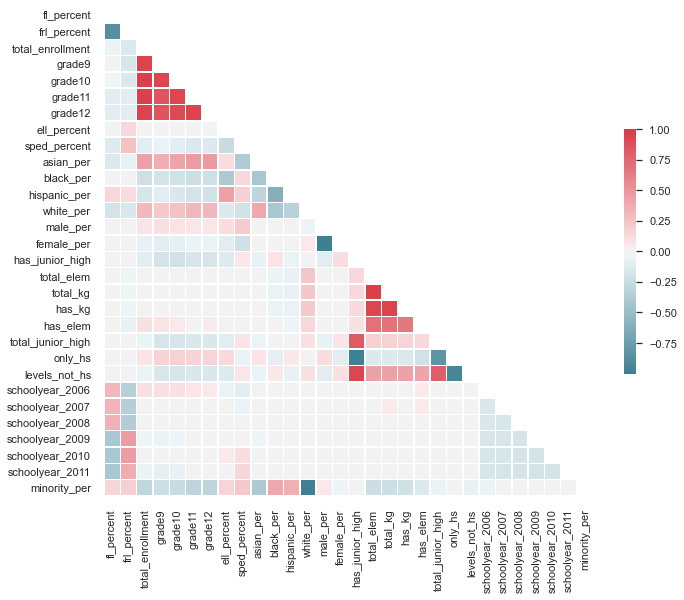

In [25]:
sns.set(style="white")
# Compute the correlation matrix
corr = X_train_8.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train_8.drop(columns=to_drop, inplace=False)
X_test_8.drop(columns=to_drop, inplace=False)

,fl_percent,frl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,has_junior_high,total_elem,has_elem,total_junior_high,schoolyear_2006,schoolyear_2007,schoolyear_2008,schoolyear_2009,schoolyear_2010,schoolyear_2011
954,74.4,0.0,333,6.6,24.3,0.9,30.6,66.1,2.1,49.8,0,0.0,0,0.0,0,1,0,0,0,0
1302,0.0,90.0,425,17.6,24.7,0.0,35.1,64.0,0.5,51.8,0,0.0,0,0.0,0,0,0,0,1,0
1735,0.0,87.7,138,8.0,15.2,3.6,81.2,13.8,1.4,27.5,0,0.0,0,0.0,0,0,0,0,0,1
337,78.4,0.0,656,10.4,9.1,1.1,11.4,79.4,1.2,41.9,0,0.0,0,0.0,0,0,0,0,0,0
807,63.5,0.0,283,2.5,12.0,3.2,44.9,45.6,5.7,43.1,0,0.0,0,0.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,0.0,79.2,1711,4.3,6.4,19.9,20.4,57.2,2.0,46.1,0,0.0,0,0.0,0,0,0,0,1,0
2035,0.0,63.9,279,2.2,12.9,1.8,79.6,17.9,0.4,39.8,0,0.0,0,0.0,0,0,0,0,1,0
1221,64.8,0.0,474,12.0,16.0,4.9,36.7,57.6,0.8,63.3,0,0.0,0,0.0,0,0,1,0,0,0
1438,0.0,84.8,295,12.5,15.9,33.6,34.6,22.0,9.5,0.0,1,0.0,0,208.0,0,0,0,0,1,0


In [27]:
to_drop

['grade9',
 'grade10',
 'grade11',
 'grade12',
 'female_per',
 'total_kg',
 'has_kg',
 'only_hs',
 'levels_not_hs',
 'minority_per']

## K-Best features
___

In [28]:
X_train.shape

(1750, 495)

In [29]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=23)

selector.fit(X_train, y_train)

/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=23, score_func=<function f_regression at 0x7fb306d1b940>)

In [30]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [31]:
list(selected_columns)

['sped_percent',
 'asian_per',
 'white_per',
 'minority_per',
 'ell_percent sped_percent',
 'ell_percent black_per',
 'sped_percent black_per',
 'sped_percent male_per',
 'sped_percent only_hs',
 'sped_percent minority_per',
 'asian_per white_per',
 'asian_per male_per',
 'asian_per female_per',
 'asian_per minority_per',
 'black_per hispanic_per',
 'hispanic_per white_per',
 'white_per^2',
 'white_per male_per',
 'white_per female_per',
 'white_per minority_per',
 'male_per minority_per',
 'only_hs minority_per',
 'minority_per^2']

In [32]:
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 13.042590429943722
Testing Root Mean Squared Error: 12.706611236837311


In [33]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  688530608762248.6 
 KBest:    12.706611236837311 



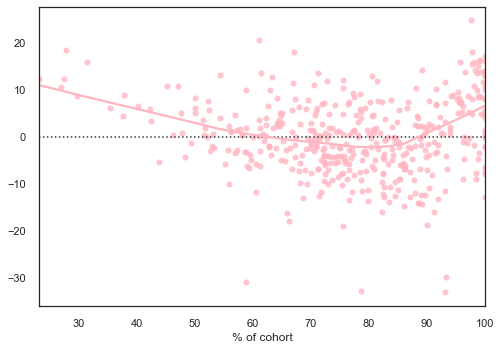

In [34]:
sns.residplot(y_test, y_kbest, lowess=True, color="lightpink")

___

In [35]:
X_train.head()

,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,schoolyear_2006,schoolyear_2007,schoolyear_2008,schoolyear_2009,schoolyear_2010,schoolyear_2011,minority_per,fl_percent^2,fl_percent frl_percent,fl_percent total_enrollment,fl_percent grade9,fl_percent grade10,fl_percent grade11,fl_percent grade12,fl_percent ell_percent,fl_percent sped_percent,fl_percent asian_per,fl_percent black_per,fl_percent hispanic_per,fl_percent white_per,fl_percent male_per,fl_percent female_per,fl_percent has_junior_high,fl_percent total_elem,fl_percent total_kg,fl_percent has_kg,fl_percent has_elem,fl_percent total_junior_high,fl_percent only_hs,fl_percent levels_not_hs,fl_percent schoolyear_2006,fl_percent schoolyear_2007,fl_percent schoolyear_2008,fl_percent schoolyear_2009,fl_percent schoolyear_2010,fl_percent schoolyear_2011,fl_percent minority_per,frl_percent^2,frl_percent total_enrollment,frl_percent grade9,frl_percent grade10,frl_percent grade11,frl_percent grade12,frl_percent ell_percent,frl_percent sped_percent,frl_percent asian_per,frl_percent black_per,frl_percent hispanic_per,frl_percent white_per,frl_percent male_per,frl_percent female_per,frl_percent has_junior_high,frl_percent total_elem,frl_percent total_kg,frl_percent has_kg,frl_percent has_elem,frl_percent total_junior_high,frl_percent only_hs,frl_percent levels_not_hs,frl_percent schoolyear_2006,frl_percent schoolyear_2007,frl_percent schoolyear_2008,frl_percent schoolyear_2009,frl_percent schoolyear_2010,frl_percent schoolyear_2011,frl_percent minority_per,total_enrollment^2,total_enrollment grade9,total_enrollment grade10,total_enrollment grade11,total_enrollment grade12,total_enrollment ell_percent,total_enrollment sped_percent,total_enrollment asian_per,total_enrollment black_per,total_enrollment hispanic_per,total_enrollment white_per,total_enrollment male_per,total_enrollment female_per,total_enrollment has_junior_high,total_enrollment total_elem,total_enrollment total_kg,total_enrollment has_kg,total_enrollment has_elem,total_enrollment total_junior_high,total_enrollment only_hs,total_enrollment levels_not_hs,total_enrollment schoolyear_2006,total_enrollment schoolyear_2007,total_enrollment schoolyear_2008,total_enrollment schoolyear_2009,total_enrollment schoolyear_2010,total_enrollment schoolyear_2011,total_enrollment minority_per,grade9^2,grade9 grade10,grade9 grade11,grade9 grade12,grade9 ell_percent,grade9 sped_percent,grade9 asian_per,grade9 black_per,grade9 hispanic_per,grade9 white_per,grade9 male_per,grade9 female_per,grade9 has_junior_high,grade9 total_elem,grade9 total_kg,grade9 has_kg,grade9 has_elem,grade9 total_junior_high,grade9 only_hs,grade9 levels_not_hs,grade9 schoolyear_2006,grade9 schoolyear_2007,grade9 schoolyear_2008,grade9 schoolyear_2009,grade9 schoolyear_2010,grade9 schoolyear_2011,grade9 minority_per,grade10^2,grade10 grade11,grade10 grade12,grade10 ell_percent,grade10 sped_percent,grade10 asian_per,...,male_per total_elem,male_per total_kg,male_per has_kg,male_per has_elem,male_per total_junior_high,male_per only_hs,male_per levels_not_hs,male_per schoolyear_2006,male_per schoolyear_2007,male_per schoolyear_2008,male_per schoolyear_2009,male_per schoolyear_2010,male_per schoolyear_2011,male_per minority_per,female_per^2,female_per has_junior_high,female_per total_elem,female_per total_kg,female_per has_kg,female_per has_elem,female_per total_junior_high,female_per only_hs,female_per levels_not_hs,female_per schoolyear_2006,female_per schoolyear_2007,female_per schoolyear_2008,female_per schoolyear_2009,female_per schoolyear_2010,female_per schoolyear_2011,female_per minority_per,has_junior_high^2,has_junior_high total_elem,has_junior_high total_kg,has_junior_high has_kg,has_junior_high has_elem,has_junior_high total_junior_high,has_junior_high only_h

##  Lasso Model
___

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha= 0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )

Training Error: 8.831940270229305
Testing Error: 11.528826717623515


In [37]:
X_train.shape

(1750, 495)

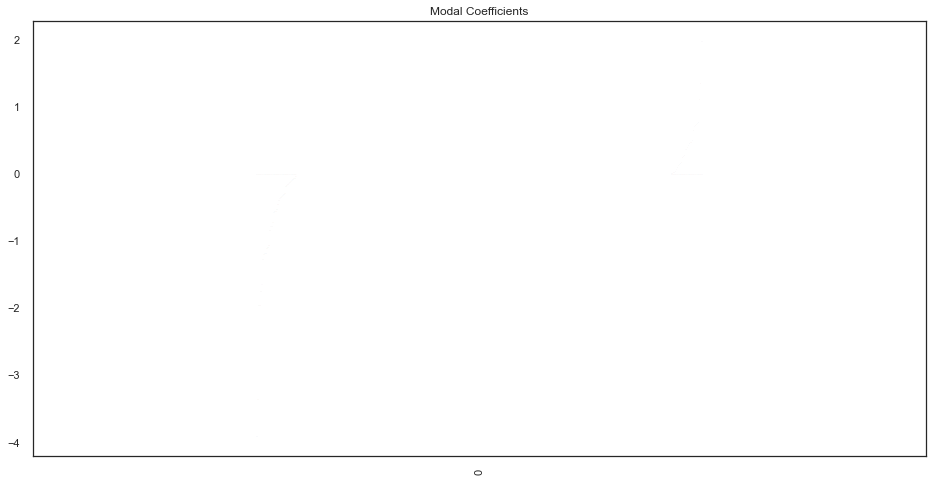

In [38]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

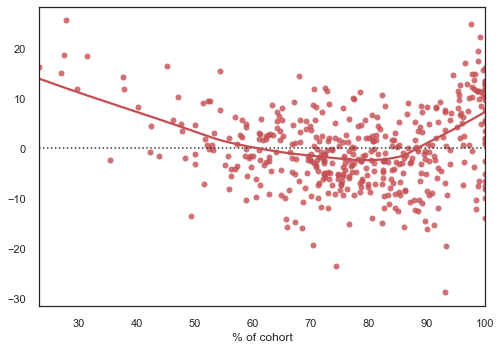

In [39]:
sns.residplot(y_test, y_pred, lowess=True, color="r")

## Evaluating different models in order to determine the best model overall

In [40]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n', 
      "Lasso 0.01: \t",  test_rmse_lasso01, '\n')

Original: 	 688530608762248.6 
 KBest: 	 12.706611236837311 
 Lasso 0.01: 	 11.528826717623515 



## Refit our best model to the entire dataset

In [41]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
print(df_poly2.shape)
df_poly2.head()

(2188, 495)


,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,schoolyear_2006,schoolyear_2007,schoolyear_2008,schoolyear_2009,schoolyear_2010,schoolyear_2011,minority_per,fl_percent^2,fl_percent frl_percent,fl_percent total_enrollment,fl_percent grade9,fl_percent grade10,fl_percent grade11,fl_percent grade12,fl_percent ell_percent,fl_percent sped_percent,fl_percent asian_per,fl_percent black_per,fl_percent hispanic_per,fl_percent white_per,fl_percent male_per,fl_percent female_per,fl_percent has_junior_high,fl_percent total_elem,fl_percent total_kg,fl_percent has_kg,fl_percent has_elem,fl_percent total_junior_high,fl_percent only_hs,fl_percent levels_not_hs,fl_percent schoolyear_2006,fl_percent schoolyear_2007,fl_percent schoolyear_2008,fl_percent schoolyear_2009,fl_percent schoolyear_2010,fl_percent schoolyear_2011,fl_percent minority_per,frl_percent^2,frl_percent total_enrollment,frl_percent grade9,frl_percent grade10,frl_percent grade11,frl_percent grade12,frl_percent ell_percent,frl_percent sped_percent,frl_percent asian_per,frl_percent black_per,frl_percent hispanic_per,frl_percent white_per,frl_percent male_per,frl_percent female_per,frl_percent has_junior_high,frl_percent total_elem,frl_percent total_kg,frl_percent has_kg,frl_percent has_elem,frl_percent total_junior_high,frl_percent only_hs,frl_percent levels_not_hs,frl_percent schoolyear_2006,frl_percent schoolyear_2007,frl_percent schoolyear_2008,frl_percent schoolyear_2009,frl_percent schoolyear_2010,frl_percent schoolyear_2011,frl_percent minority_per,total_enrollment^2,total_enrollment grade9,total_enrollment grade10,total_enrollment grade11,total_enrollment grade12,total_enrollment ell_percent,total_enrollment sped_percent,total_enrollment asian_per,total_enrollment black_per,total_enrollment hispanic_per,total_enrollment white_per,total_enrollment male_per,total_enrollment female_per,total_enrollment has_junior_high,total_enrollment total_elem,total_enrollment total_kg,total_enrollment has_kg,total_enrollment has_elem,total_enrollment total_junior_high,total_enrollment only_hs,total_enrollment levels_not_hs,total_enrollment schoolyear_2006,total_enrollment schoolyear_2007,total_enrollment schoolyear_2008,total_enrollment schoolyear_2009,total_enrollment schoolyear_2010,total_enrollment schoolyear_2011,total_enrollment minority_per,grade9^2,grade9 grade10,grade9 grade11,grade9 grade12,grade9 ell_percent,grade9 sped_percent,grade9 asian_per,grade9 black_per,grade9 hispanic_per,grade9 white_per,grade9 male_per,grade9 female_per,grade9 has_junior_high,grade9 total_elem,grade9 total_kg,grade9 has_kg,grade9 has_elem,grade9 total_junior_high,grade9 only_hs,grade9 levels_not_hs,grade9 schoolyear_2006,grade9 schoolyear_2007,grade9 schoolyear_2008,grade9 schoolyear_2009,grade9 schoolyear_2010,grade9 schoolyear_2011,grade9 minority_per,grade10^2,grade10 grade11,grade10 grade12,grade10 ell_percent,grade10 sped_percent,grade10 asian_per,...,male_per total_elem,male_per total_kg,male_per has_kg,male_per has_elem,male_per total_junior_high,male_per only_hs,male_per levels_not_hs,male_per schoolyear_2006,male_per schoolyear_2007,male_per schoolyear_2008,male_per schoolyear_2009,male_per schoolyear_2010,male_per schoolyear_2011,male_per minority_per,female_per^2,female_per has_junior_high,female_per total_elem,female_per total_kg,female_per has_kg,female_per has_elem,female_per total_junior_high,female_per only_hs,female_per levels_not_hs,female_per schoolyear_2006,female_per schoolyear_2007,female_per schoolyear_2008,female_per schoolyear_2009,female_per schoolyear_2010,female_per schoolyear_2011,female_per minority_per,has_junior_high^2,has_junior_high total_elem,has_junior_high total_kg,has_junior_high has_kg,has_junior_high has_elem,has_junior_high total_junior_high,has_junior_high only_h

In [42]:
scaler = StandardScaler()

#fit and transform the  data
df_poly2 = pd.DataFrame(data=scaler.fit_transform(df_poly2), columns=df_poly2.columns)

In [43]:
target

0       76.6
1       66.8
2       65.1
3       52.4
4       74.0
        ... 
2183    60.0
2184    87.2
2185    88.5
2186    58.6
2187    50.0
Name: % of cohort, Length: 2188, dtype: float64

In [44]:
lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(df_poly2,target)

Lasso(alpha=0.1)

In [45]:
lasso.coef_

array([ 0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.07564872, -1.46015652,  0.09302264,
       -0.        ,  0.        , -0.48701257, -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.09295456, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  1.58358051, -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.44

___

## Read in holdout data

In [46]:
holdout = pd.read_csv('graduation_test.csv')
holdout.head()

,DBN,schoolyear,% of cohort,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs
0,03M860,2009,70.7,0.0,74.4,441,91.0,80.0,68.0,55.0,4.3,20.0,0.5,79.4,18.8,0.5,52.8,47.2,1,0.0,0.0,0,0,147.0,0,1
1,23K643,2010,50.0,0.0,46.9,203,35.0,53.0,34.0,81.0,4.9,14.3,0.0,86.7,10.3,1.5,47.3,52.7,0,0.0,0.0,0,0,0.0,1,0
2,02M394,2011,58.6,0.0,97.0,250,13.0,156.0,80.0,1.0,82.8,0.0,62.4,7.2,26.4,4.0,51.2,48.8,0,0.0,0.0,0,0,0.0,1,0
3,24Q610,2009,94.4,0.0,75.5,2097,626.0,507.0,461.0,503.0,3.0,4.6,23.1,7.2,57.6,9.9,86.6,13.4,0,0.0,0.0,0,0,0.0,1,0
4,02M519,2010,96.0,0.0,50.0,503,230.0,85.0,100.0,88.0,0.0,3.6,4.6,36.2,38.4,20.9,22.7,77.3,0,0.0,0.0,0,0,0.0,1,0


## Feature Engineering for holdout set

In [47]:
holdout = pd.get_dummies(holdout, columns = ['schoolyear'], drop_first= True)  # create dummy columns for year

In [48]:
# create a columns to aggregate minority students percentage
holdout['minority_per'] = df['asian_per'] + df['black_per'] + df['hispanic_per']

In [49]:
holdout.head()

,DBN,% of cohort,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,schoolyear_2006,schoolyear_2007,schoolyear_2008,schoolyear_2009,schoolyear_2010,schoolyear_2011,minority_per
0,03M860,70.7,0.0,74.4,441,91.0,80.0,68.0,55.0,4.3,20.0,0.5,79.4,18.8,0.5,52.8,47.2,1,0.0,0.0,0,0,147.0,0,1,0,0,0,1,0,0,92.9
1,23K643,50.0,0.0,46.9,203,35.0,53.0,34.0,81.0,4.9,14.3,0.0,86.7,10.3,1.5,47.3,52.7,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,1,0,90.6
2,02M394,58.6,0.0,97.0,250,13.0,156.0,80.0,1.0,82.8,0.0,62.4,7.2,26.4,4.0,51.2,48.8,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,0,1,95.7
3,24Q610,94.4,0.0,75.5,2097,626.0,507.0,461.0,503.0,3.0,4.6,23.1,7.2,57.6,9.9,86.6,13.4,0,0.0,0.0,0,0,0.0,1,0,0,0,0,1,0,0,78.9
4,02M519,96.0,0.0,50.0,503,230.0,85.0,100.0,88.0,0.0,3.6,4.6,36.2,38.4,20.9,22.7,77.3,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,1,0,95.1


In [50]:
holdout_df = holdout.drop(columns = ['DBN','% of cohort'])
target = holdout['% of cohort']

In [51]:
print(holdout_df.shape)
holdout_df.head()

(548, 30)


,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,schoolyear_2006,schoolyear_2007,schoolyear_2008,schoolyear_2009,schoolyear_2010,schoolyear_2011,minority_per
0,0.0,74.4,441,91.0,80.0,68.0,55.0,4.3,20.0,0.5,79.4,18.8,0.5,52.8,47.2,1,0.0,0.0,0,0,147.0,0,1,0,0,0,1,0,0,92.9
1,0.0,46.9,203,35.0,53.0,34.0,81.0,4.9,14.3,0.0,86.7,10.3,1.5,47.3,52.7,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,1,0,90.6
2,0.0,97.0,250,13.0,156.0,80.0,1.0,82.8,0.0,62.4,7.2,26.4,4.0,51.2,48.8,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,0,1,95.7
3,0.0,75.5,2097,626.0,507.0,461.0,503.0,3.0,4.6,23.1,7.2,57.6,9.9,86.6,13.4,0,0.0,0.0,0,0,0.0,1,0,0,0,0,1,0,0,78.9
4,0.0,50.0,503,230.0,85.0,100.0,88.0,0.0,3.6,4.6,36.2,38.4,20.9,22.7,77.3,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,1,0,95.1


In [52]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(holdout_df)
poly2_columns = poly_2.get_feature_names(holdout_df.columns)
holdout_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
print(holdout_poly2.shape)
holdout_poly2.head()

(548, 495)


,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,schoolyear_2006,schoolyear_2007,schoolyear_2008,schoolyear_2009,schoolyear_2010,schoolyear_2011,minority_per,fl_percent^2,fl_percent frl_percent,fl_percent total_enrollment,fl_percent grade9,fl_percent grade10,fl_percent grade11,fl_percent grade12,fl_percent ell_percent,fl_percent sped_percent,fl_percent asian_per,fl_percent black_per,fl_percent hispanic_per,fl_percent white_per,fl_percent male_per,fl_percent female_per,fl_percent has_junior_high,fl_percent total_elem,fl_percent total_kg,fl_percent has_kg,fl_percent has_elem,fl_percent total_junior_high,fl_percent only_hs,fl_percent levels_not_hs,fl_percent schoolyear_2006,fl_percent schoolyear_2007,fl_percent schoolyear_2008,fl_percent schoolyear_2009,fl_percent schoolyear_2010,fl_percent schoolyear_2011,fl_percent minority_per,frl_percent^2,frl_percent total_enrollment,frl_percent grade9,frl_percent grade10,frl_percent grade11,frl_percent grade12,frl_percent ell_percent,frl_percent sped_percent,frl_percent asian_per,frl_percent black_per,frl_percent hispanic_per,frl_percent white_per,frl_percent male_per,frl_percent female_per,frl_percent has_junior_high,frl_percent total_elem,frl_percent total_kg,frl_percent has_kg,frl_percent has_elem,frl_percent total_junior_high,frl_percent only_hs,frl_percent levels_not_hs,frl_percent schoolyear_2006,frl_percent schoolyear_2007,frl_percent schoolyear_2008,frl_percent schoolyear_2009,frl_percent schoolyear_2010,frl_percent schoolyear_2011,frl_percent minority_per,total_enrollment^2,total_enrollment grade9,total_enrollment grade10,total_enrollment grade11,total_enrollment grade12,total_enrollment ell_percent,total_enrollment sped_percent,total_enrollment asian_per,total_enrollment black_per,total_enrollment hispanic_per,total_enrollment white_per,total_enrollment male_per,total_enrollment female_per,total_enrollment has_junior_high,total_enrollment total_elem,total_enrollment total_kg,total_enrollment has_kg,total_enrollment has_elem,total_enrollment total_junior_high,total_enrollment only_hs,total_enrollment levels_not_hs,total_enrollment schoolyear_2006,total_enrollment schoolyear_2007,total_enrollment schoolyear_2008,total_enrollment schoolyear_2009,total_enrollment schoolyear_2010,total_enrollment schoolyear_2011,total_enrollment minority_per,grade9^2,grade9 grade10,grade9 grade11,grade9 grade12,grade9 ell_percent,grade9 sped_percent,grade9 asian_per,grade9 black_per,grade9 hispanic_per,grade9 white_per,grade9 male_per,grade9 female_per,grade9 has_junior_high,grade9 total_elem,grade9 total_kg,grade9 has_kg,grade9 has_elem,grade9 total_junior_high,grade9 only_hs,grade9 levels_not_hs,grade9 schoolyear_2006,grade9 schoolyear_2007,grade9 schoolyear_2008,grade9 schoolyear_2009,grade9 schoolyear_2010,grade9 schoolyear_2011,grade9 minority_per,grade10^2,grade10 grade11,grade10 grade12,grade10 ell_percent,grade10 sped_percent,grade10 asian_per,...,male_per total_elem,male_per total_kg,male_per has_kg,male_per has_elem,male_per total_junior_high,male_per only_hs,male_per levels_not_hs,male_per schoolyear_2006,male_per schoolyear_2007,male_per schoolyear_2008,male_per schoolyear_2009,male_per schoolyear_2010,male_per schoolyear_2011,male_per minority_per,female_per^2,female_per has_junior_high,female_per total_elem,female_per total_kg,female_per has_kg,female_per has_elem,female_per total_junior_high,female_per only_hs,female_per levels_not_hs,female_per schoolyear_2006,female_per schoolyear_2007,female_per schoolyear_2008,female_per schoolyear_2009,female_per schoolyear_2010,female_per schoolyear_2011,female_per minority_per,has_junior_high^2,has_junior_high total_elem,has_junior_high total_kg,has_junior_high has_kg,has_junior_high has_elem,has_junior_high total_junior_high,has_junior_high only_h

## Predict the holdout set

In [53]:
transformed_holdout = scaler.transform(holdout_poly2)

In [54]:
print(transformed_holdout.shape)
transformed_holdout

(548, 495)


array([[-0.95643513,  1.09131977, -0.37550821, ..., -0.43340432,
        -0.42721773,  0.13520168],
       [-0.95643513,  0.35582712, -0.63429597, ..., -0.43340432,
        -0.42721773, -0.07224545],
       [-0.95643513,  1.695761  , -0.58319082, ...,  2.30731433,
         2.41818632,  0.39476496],
       ...,
       [-0.95643513,  1.63424707, -0.52229959, ..., -0.43340432,
        -0.42721773,  0.53698703],
       [ 1.55421743, -0.89852217, -0.36680947, ..., -0.43340432,
        -0.42721773,  0.66203531],
       [ 0.00490373, -0.89852217, -0.23197887, ..., -0.43340432,
        -0.42721773, -3.30062025]])

In [55]:
final_answers = lasso.predict(transformed_holdout)

In [56]:
# train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(target, final_answers))
# print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )

Testing Error: 11.517114785717963


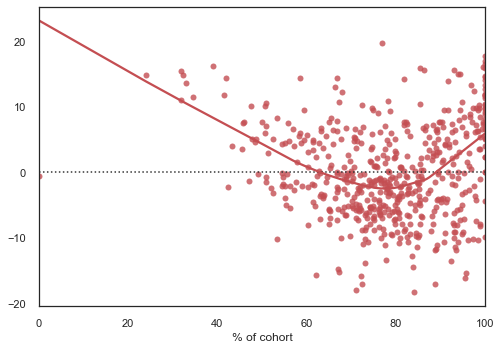

In [57]:
sns.residplot(target, final_answers, lowess=True, color="r")